In [ ]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
#from tensorflow import Keras as K
#K.set_image_data_format('tf')
tf.keras.backend.set_image_data_format('channels_last')
from tensorflow.keras import regularizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2.12.0
2.12.0


In [ ]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/drive/MyDrive/Biometric-Ear-Recognition/Images/raw'
data_dir_list = os.listdir(data_path)
sort_dir_list = sorted(data_dir_list)
print(len(sort_dir_list))
img_rows=128
img_cols=128
num_channel=1
num_epoch=200

1089


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_data_list=[]

for bmp in sort_dir_list:
    img_path = os.path.join(data_path,bmp)
    input_img= cv2.imread(img_path)
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_resize=cv2.resize(input_img,(128,128))
    img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(1089, 128, 128)


In [ ]:
if num_channel==1:
	if tf.keras.backend.image_data_format()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print (img_data.shape)
		
else:
	if K.backend.image_data_format()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(1089, 128, 128, 1)


In [ ]:
#%%
# Assigning Labels

# Define the number of classes
num_classes = 51

num_of_samples = img_data.shape[0]

labels = np.ones((num_of_samples,),dtype='int64')

count = 0
precount = count
count_class = 1
for img in	sort_dir_list:
  if int(img[1:3]) == count_class:
    count+=1
  else:
    labels[precount:count] = count_class
    precount = count
    count_class += 1
    count+=1
labels[precount:1089] = count_class
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
print(Y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
#%%
# Defining the model
# img_data = tf.expand_dims(img_data,axis=-1)
print(img_data.shape)
input_shape=img_data[0].shape
print(input_shape)

model = Sequential()
model.add(Convolution2D(32, 3, padding='same', activation='relu', input_shape= input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

#sgd = SGD(lr=0.01, decay=5e-4, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer= 'adam',metrics=["accuracy"])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

(1089, 128, 128, 1)
(128, 128, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)  

True

In [ ]:
# Training
num_epoch = 2000
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)
print(num_epoch)

Epoch 1/2000
55/55 [==============================] - 12s 19ms/step - loss: 8.4327 - accuracy: 0.0264 - val_loss: 5.1311 - val_accuracy: 0.0183
Epoch 2/2000
55/55 [==============================] - 0s 7ms/step - loss: 4.5810 - accuracy: 0.0299 - val_loss: 4.2794 - val_accuracy: 0.0183
Epoch 3/2000
55/55 [==============================] - 0s 7ms/step - loss: 4.1570 - accuracy: 0.0390 - val_loss: 4.0886 - val_accuracy: 0.0183
Epoch 4/2000
55/55 [==============================] - 0s 7ms/step - loss: 4.0190 - accuracy: 0.0344 - val_loss: 4.0203 - val_accuracy: 0.0183
Epoch 5/2000
55/55 [==============================] - 0s 7ms/step - loss: 3.9780 - accuracy: 0.0333 - val_loss: 3.9726 - val_accuracy: 0.0183
Epoch 6/2000
55/55 [==============================] - 0s 7ms/step - loss: 3.9561 - accuracy: 0.0287 - val_loss: 3.9672 - val_accuracy: 0.0183
Epoch 7/2000
55/55 [==============================] - 0s 7ms/step - loss: 3.9394 - accuracy: 0.0379 - val_loss: 3.9634 - val_accuracy: 0.0183
Epoc

In [ ]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{accuracy:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/2000
55/55 [==============================] - ETA: 0s - loss: 2.9427 - accuracy: 0.8886
Epoch 1: val_loss improved from inf to 3.40118, saving model to Best-weights-my_model-001-2.9427-0.8886.hdf5
55/55 [==============================] - 1s 14ms/step - loss: 2.9427 - accuracy: 0.8886 - val_loss: 3.4012 - val_accuracy: 0.7890
Epoch 2/2000
51/55 [==========================>...] - ETA: 0s - loss: 2.9598 - accuracy: 0.8897
Epoch 2: val_loss improved from 3.40118 to 3.35825, saving model to Best-weights-my_model-002-2.9543-0.8932.hdf5
55/55 [==============================] - 1s 12ms/step - loss: 2.9543 - accuracy: 0.8932 - val_loss: 3.3583 - val_accuracy: 0.8119
Epoch 3/2000
51/55 [==========================>...] - ETA: 0s - loss: 2.8784 - accuracy: 0.9240
Epoch 3: val_loss improved from 3.35825 to 3.28684, saving model to Best-weights-my_model-003-2.8746-0.9242.hdf5
55/55 [==============================] - 1s 12ms/step - loss: 2.8746 - accuracy: 0.9242 - val_loss: 3.2868 - val_accu

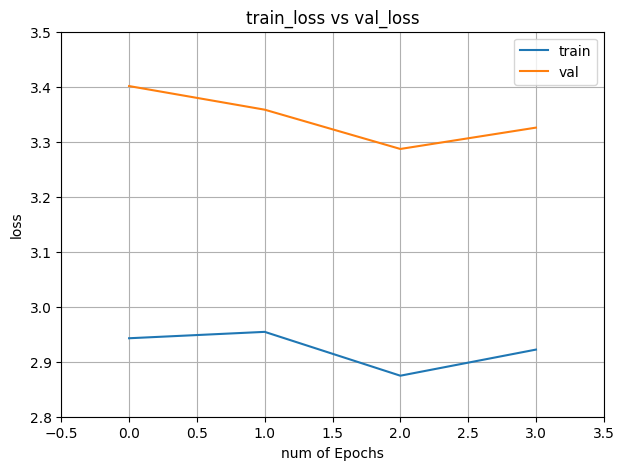

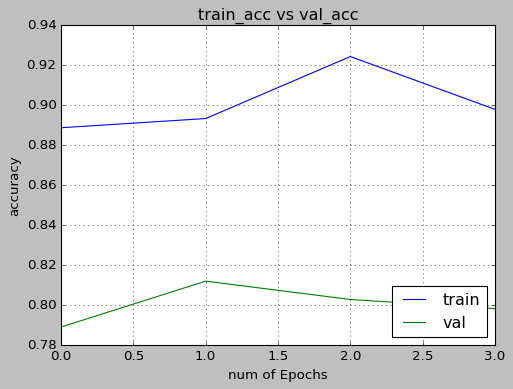

In [ ]:
#%%
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(len(train_loss))
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

#%%

In [ ]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:100]
print (test_image.shape)
y_pred = model.predict(test_image)
predicted_classes = np.argmax(y_pred[0])
print(predicted_classes)
print(np.argmax(y_test[0:100]))

Test Loss: 3.3256077766418457
Test accuracy: 0.7981651425361633
(100, 128, 128, 1)
4/4 [==============================] - 0s 28ms/step
34
34


In [ ]:
# Testing a new image
# test_image = cv2.imread('raw/002_3_0_1923.bmp')

def predict_new_image(test_link,name):
	link_image = os.path.join(test_link,name) 
	test_image = cv2.imread(link_image)
	test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
	test_image=cv2.resize(test_image,(128,128))
	test_image = np.array(test_image)
	test_image = test_image.astype('float32')
	test_image /= 255
		
	if num_channel==1:
		if K.image_data_format()=='th':
			test_image= np.expand_dims(test_image, axis=0)
			test_image= np.expand_dims(test_image, axis=0)
			#print (test_image.shape)
		else:
			#test_image= np.expand_dims(test_image, axis=3) 
			test_image= np.expand_dims(test_image, axis=2) 
			test_image= np.expand_dims(test_image, axis=0)
			#print (test_image.shape)
			
	else:
		if K.image_data_format()=='th':
			test_image=np.rollaxis(test_image,2,0)
			test_image= np.expand_dims(test_image, axis=0)
			#print (test_image.shape)
		else:
			test_image= np.expand_dims(test_image, axis=0)
			#print (test_image.shape)
		
	# Predicting the test image
	y_pre = model.predict(test_image)
	temp = y_pre[0]
	predict_classes = np.argmax(temp)
	return (int(name[1:3]),predict_classes)
test_link = '/content/drive/MyDrive/Biometric-Ear-Recognition/Images/test'
test_dir_list = os.listdir(test_link)
acc_test = 0
for img in test_dir_list:
	y,pre_y = predict_new_image(test_link,img)
	print(y,pre_y)
	if y == pre_y:
		acc_test+=1
print(acc_test/186)

1/1 [==============================] - 0s 21ms/step
8 8
1/1 [==============================] - 0s 23ms/step
3 3
1/1 [==============================] - 0s 20ms/step
3 3
1/1 [==============================] - 0s 20ms/step
6 6
1/1 [==============================] - 0s 21ms/step
8 20
1/1 [==============================] - 0s 20ms/step
10 10
1/1 [==============================] - 0s 20ms/step
10 10
1/1 [==============================] - 0s 20ms/step
9 9
1/1 [==============================] - 0s 21ms/step
2 2
1/1 [==============================] - 0s 20ms/step
9 9
1/1 [==============================] - 0s 20ms/step
2 2
1/1 [==============================] - 0s 21ms/step
6 6
1/1 [==============================] - 0s 20ms/step
1 1
1/1 [==============================] - 0s 20ms/step
8 8
1/1 [==============================] - 0s 20ms/step
3 3
1/1 [==============================] - 0s 22ms/step
10 20
1/1 [==============================] - 0s 20ms/step
4 4
1/1 [==============================] - 0s

In [ ]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['true label']
					
#print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))



7/7 [==============================] - 0s 3ms/step
[[1.21e-18 1.09e-10 2.94e-13 ... 1.54e-08 3.05e-19 5.39e-15]
 [5.69e-12 3.71e-06 4.12e-09 ... 1.65e-09 9.66e-11 2.02e-10]
 [2.60e-11 9.28e-08 1.22e-06 ... 2.79e-06 6.54e-08 2.19e-11]
 ...
 [2.72e-14 5.03e-07 2.84e-14 ... 1.06e-05 4.32e-01 1.43e-02]
 [3.55e-23 1.07e-08 1.67e-08 ... 1.66e-13 1.21e-20 1.83e-12]
 [1.02e-25 1.64e-17 9.08e-14 ... 1.00e+00 8.24e-15 3.00e-11]]
[34 35 13 17 29 44  7 27 15 27 15 33 12 20 13 17 14 25 34 31 47 36  1 14
 14 41 39 22 47  6 18 29  2 18 35 24 44 37 32 37 42  2 29  4 10 31 23 42
  5 30 28  8 13 21  6 20 31  2 12 32 39 30 30 50 10 16 46  2 29  6 47 41
 44  4 39 28 26 39 49 13 31 12 13  9 44 21 40 19 21 33 31 17  8 16  7 33
 22 13 13 20 23 42  4 34  2  1  1  1 28 34 26 49 13 40  2  7  4 20 15 34
 10 47 13 31 41  1  2 22 35 10 24 33 48 12 23  5 21 48 10 14 30  6 50 13
 17 30 13 38  7 44 13  9 13 47 37 36 48 22 30 28  2 20 41 19 32 48 36 20
  2 32  6 39  5 23 14 23 44 27 39 16 50 28 20  3  1 48 46 30 37 33

Confusion matrix, without normalization
[[6 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 3]]


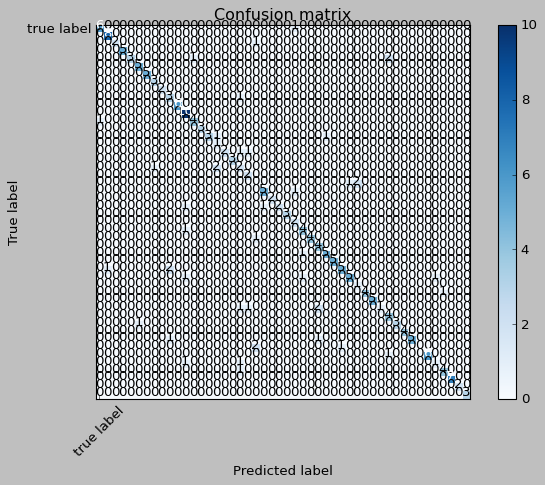

In [ ]:

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [ ]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model_new.hdf5')
loaded_model=load_model('model_new.hdf5')
model=load_model('model_new.hdf5')

Saved model to disk
Loaded model from disk
